In [16]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
print(os.listdir("/Users/sriramreddy/Downloads/523/ex1/train/"))
#I need to resize the images. So opencv
#SVC curve fitting for classification ---- scikitlearn

['freshbanana', '.DS_Store', 'rottenbanana', 'freshoranges', 'freshapples', 'rottenoranges', 'rottenapples']


In [17]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("/Users/sriramreddy/Downloads/523/ex1/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        #why do we need to convert the RGB2BGR
        #I don't think it is going to affect training
        #BGR was a choice made for historical reasons and now we have to live with it. In other words, BGR is the horse’s ass in OpenCV.
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
fruit_images = fruit_images.reshape(len(fruit_images),-1)
labels = np.array(labels)

In [11]:
print(np.shape(fruit_images))
#print(fruit_images)
#print(labels)

(1213, 12100)


In [25]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.SVC()
clf=RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(fruit_images, labels) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

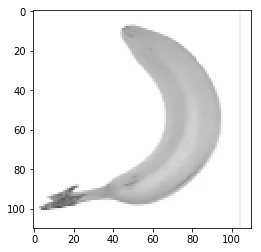

In [26]:
import matplotlib.pyplot as plt
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("/Users/sriramreddy/Downloads/523/ex1/test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
plt.imshow(cv2.cvtColor(validation_fruit_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imshow(validation_fruit_images[1])
validation_fruit_images = validation_fruit_images.reshape(len(validation_fruit_images),-1)
validation_labels = np.array(validation_labels)

In [20]:
print(np.shape(validation_fruit_images))

(298, 12100)


In [27]:
#print(np.shape(validation_fruit_images))
print(validation_fruit_images[9])
print(validation_labels[9])
print(fruit_images[9])
print(labels[9])
for i in range(1,1000,40):
    check=clf.predict([fruit_images[i]])
    print(check,"correct label", labels[i])

[255 255 255 ... 240 240 255]
freshbanana
[255 255 255 ... 255 255 255]
freshbanana
['freshbanana'] correct label freshbanana
['freshbanana'] correct label freshbanana
['freshbanana'] correct label freshbanana
['freshbanana'] correct label freshbanana
['freshbanana'] correct label freshbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['freshoranges'] correct label freshoranges
['freshoranges'] correct label freshoranges
['rottenoranges'] correct label freshoranges
['freshoranges'] correct label freshoranges
['freshapples'] correct label freshapples
['freshapples'] correct label freshapples
['freshapples'] correct label freshapples
['freshapples'] correct label freshapples
['freshapples'] correct label freshapples
['rottenoranges'] correct label rottenoranges
['rotteno

In [23]:
print(np.shape(validation_fruit_images))
#classes: 4*3/2 = 6

(298, 12100)


In [28]:
#Measuring the accuracy
count=0 
total = np.shape(validation_fruit_images)[0]
#print(total)
for i in range(298):
    check=clf.predict([validation_fruit_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

199
Accuracy is  0.6677852348993288


In [44]:
#Normal Binary classification of images are not working with this approach
#Accuracy with depth 2 is  0.43288590604026844
#Accuracy with depth 3 is  0.49328859060402686
#Accuracy with depth 9 is  0.49328859060402686
